In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib


import os

In [8]:
file_name = 'data/lambda_0_det_vs_prob.csv'
df = pd.read_csv(file_name)
sns.set(font_scale=0.5)  # crazy big

# Some keys
GATE_SELECTION_MODE  = 'gate_selection_mode'
GATE_TYPE  = 'gate'
PROJ_DIM = 'proj_dim'
def build_plot_label(df_line):

    def get_value_without_key(s):
        return s.split('.')[-1]
    return f"{get_value_without_key(df_line[GATE_TYPE])}_{get_value_without_key(df_line[GATE_SELECTION_MODE])}_{df_line[PROJ_DIM]}"


build_plot_label(df.iloc[2])

'UNCERTAINTY_DETERMINISTIC_128'

<BarContainer object of 16 artists>

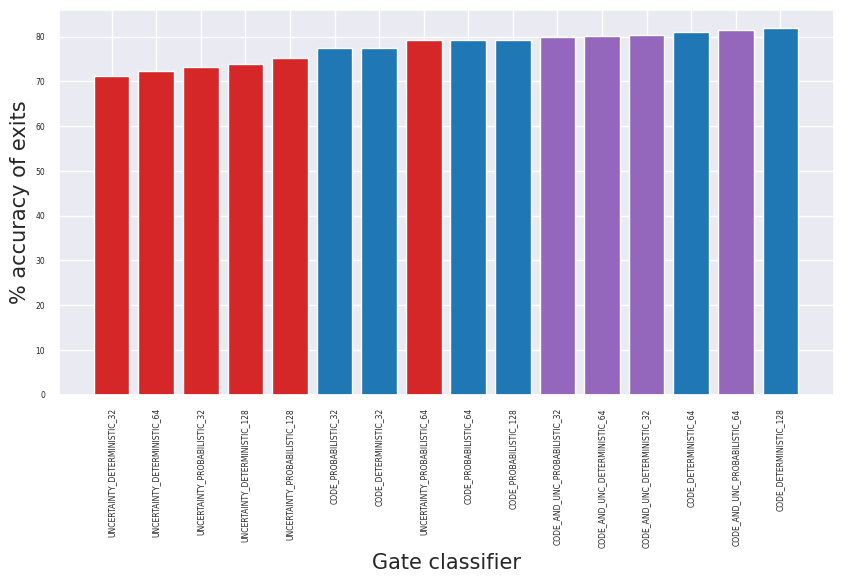

In [40]:
plot_title = 'gate exit accuracy'
sorted = df.sort_values(by=['test/gate_exit_acc'])
gate_exit_acc_df = sorted['test/gate_exit_acc']
figure(figsize=(10, 5))
gate_exit_acc_df.head()
# sns.lineplot(data=gate_exit_acc_df)
# plt.ylabel('Percentage')
# plt.show()
label_list = []
plt.xticks(rotation=90)
colors = []
color_map = {'GateType.UNCERTAINTY': 'tab:red', 'GateType.CODE': 'tab:blue', 'GateType.CODE_AND_UNC':'tab:purple'}
for i in range(len(sorted)):
    label = build_plot_label(sorted.iloc[i])
    label_list.append(label)
    colors.append(color_map[sorted.iloc[i][GATE_TYPE]])
plt.xlabel("Gate classifier", fontsize=15)
plt.ylabel("% accuracy of exits", fontsize=15)
plt.bar(label_list, height=gate_exit_acc_df.to_numpy(), label=label_list, color=colors)

# plt.savefig(os.path.join('figures',plot_title+'.pdf'))

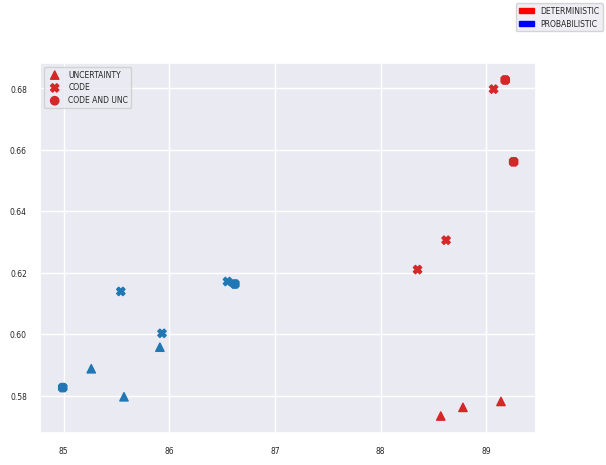

In [60]:
import matplotlib.patches as mpatches

# Scatter plot of gated acc vs cost
uncertainty_df = df[df[GATE_TYPE].str.contains("UNCERTAINTY")]
code_df = df[df[GATE_TYPE].str.contains("CODE")]
complex_df = df[df[GATE_TYPE].str.contains("CODE_AND_UNC")]
# gated_acc = df['test/gated_acc']
# cost = df['test/cost']
gated_acc_uncertainty = uncertainty_df['test/gated_acc']
cost_uncertainty = uncertainty_df['test/cost']
colors_unc = []
gated_acc_code = code_df['test/gated_acc']
cost_code = code_df['test/cost']
colors_code = []
gated_acc_complex = complex_df['test/gated_acc']
cost_complex  = complex_df['test/cost']
colors_complex = []
# label_list = []
fig, ax = plt.subplots()
color_map = {'GateSelectionMode.DETERMINISTIC': 'tab:red', 'GateSelectionMode.PROBABILISTIC': 'tab:blue'}
for i in range(len(gated_acc_uncertainty)):
    colors_unc.append(color_map[uncertainty_df.iloc[i][GATE_SELECTION_MODE]])

for i in range(len(gated_acc_code)):
    colors_code.append(color_map[code_df.iloc[i][GATE_SELECTION_MODE]])

for i in range(len(gated_acc_complex)):
    colors_complex.append(color_map[complex_df.iloc[i][GATE_SELECTION_MODE]])

scatter = ax.scatter(gated_acc_uncertainty, cost_uncertainty, marker='^', label='UNCERTAINTY', c = colors_unc)
ax.scatter(gated_acc_code, cost_code, marker='X', label = 'CODE', c = colors_code)
ax.scatter(gated_acc_complex, cost_complex, marker='o', label='CODE AND UNC', c=colors_complex)
red_patch = mpatches.Patch(color='red', label='DETERMINISTIC')
blue_patch = mpatches.Patch(color='blue', label='PROBABILISTIC')
fig.legend(handles=[red_patch, blue_patch])
plt.legend()

# for i, txt in enumerate(label_list):
#     ax.annotate(txt, (gated_acc[i], cost[i]))

In [ ]:
plt.close()